<a href="https://colab.research.google.com/github/Cheruugit/ML_Playground/blob/main/Car_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:
Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

**Business Goal**

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


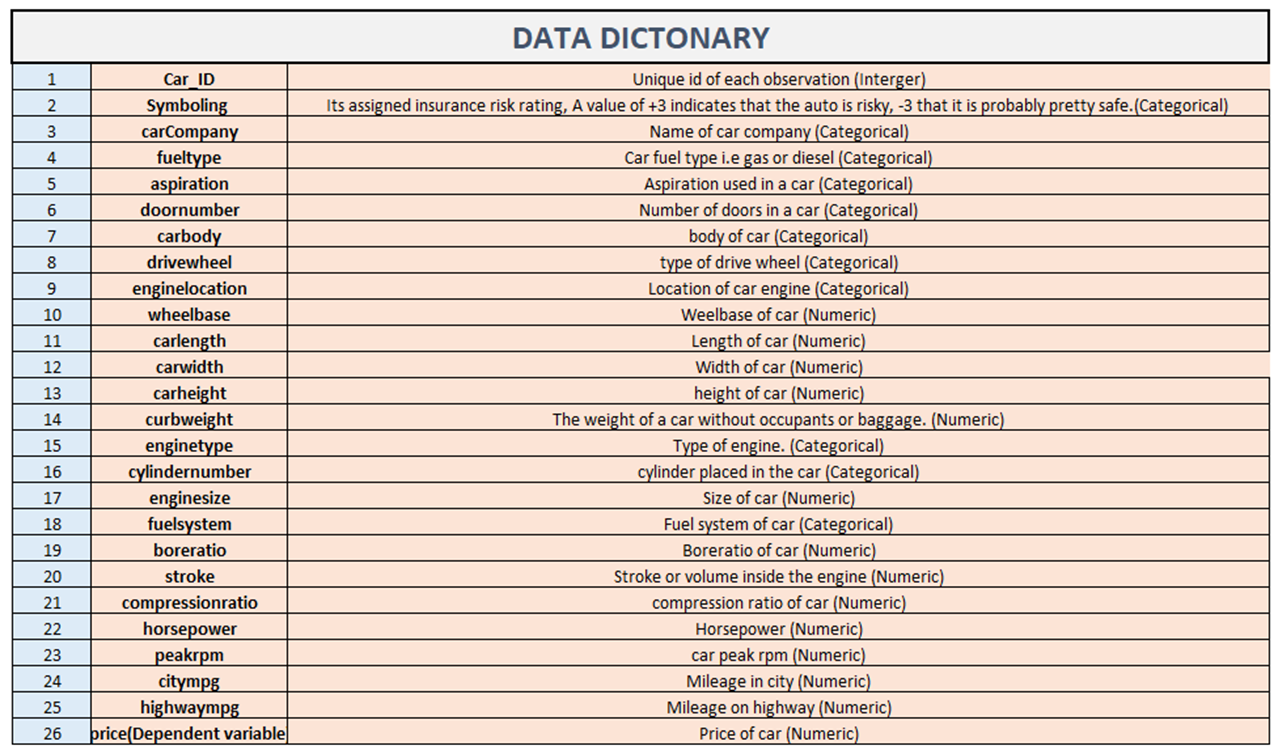

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
df=pd.read_csv('/content/CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [123]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [125]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [126]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [127]:
df= df.drop('car_ID', axis=1)

## **EDA**

<Axes: xlabel='price', ylabel='Count'>

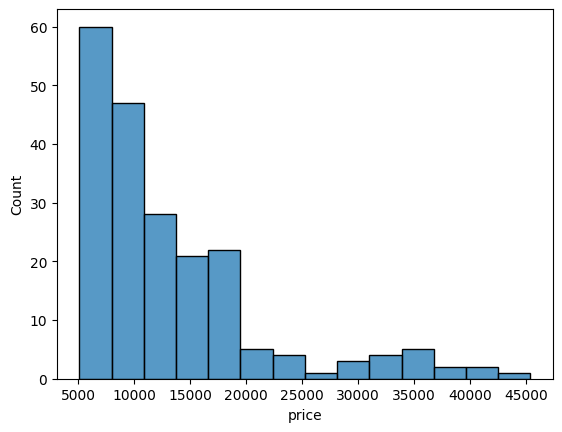

In [128]:
sns.histplot(df['price'])

The plots seems to be right skewed, the prices of almost all cars looks like less than 18000.

<ipython-input-129-e26c3bb8347f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix =df.corr()


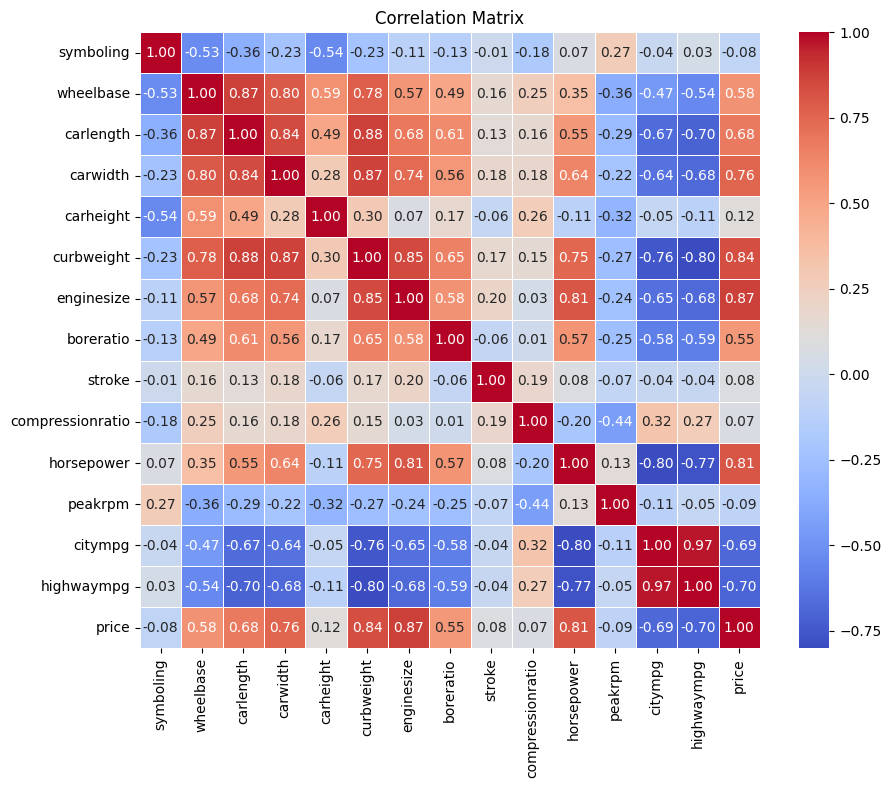

In [129]:
correlation_matrix =df.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

We can observe that price shows strong positive correlations with various features like engine size, curb weight, car width, and horsepower, indicating that luxurious(larger, heavier) and more powerful cars tend to have higher prices.
Price also has moderate negative correlations with citympg and highwaympg , suggesting that cars with high mileage have lower prices.

Something else to note is that (carlength,wheelbase),(carwidth,curbweight) have positive correlation since they all represent car dimensions.


In [130]:
# Get numerical variables
numerical_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Get categorical variables
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()

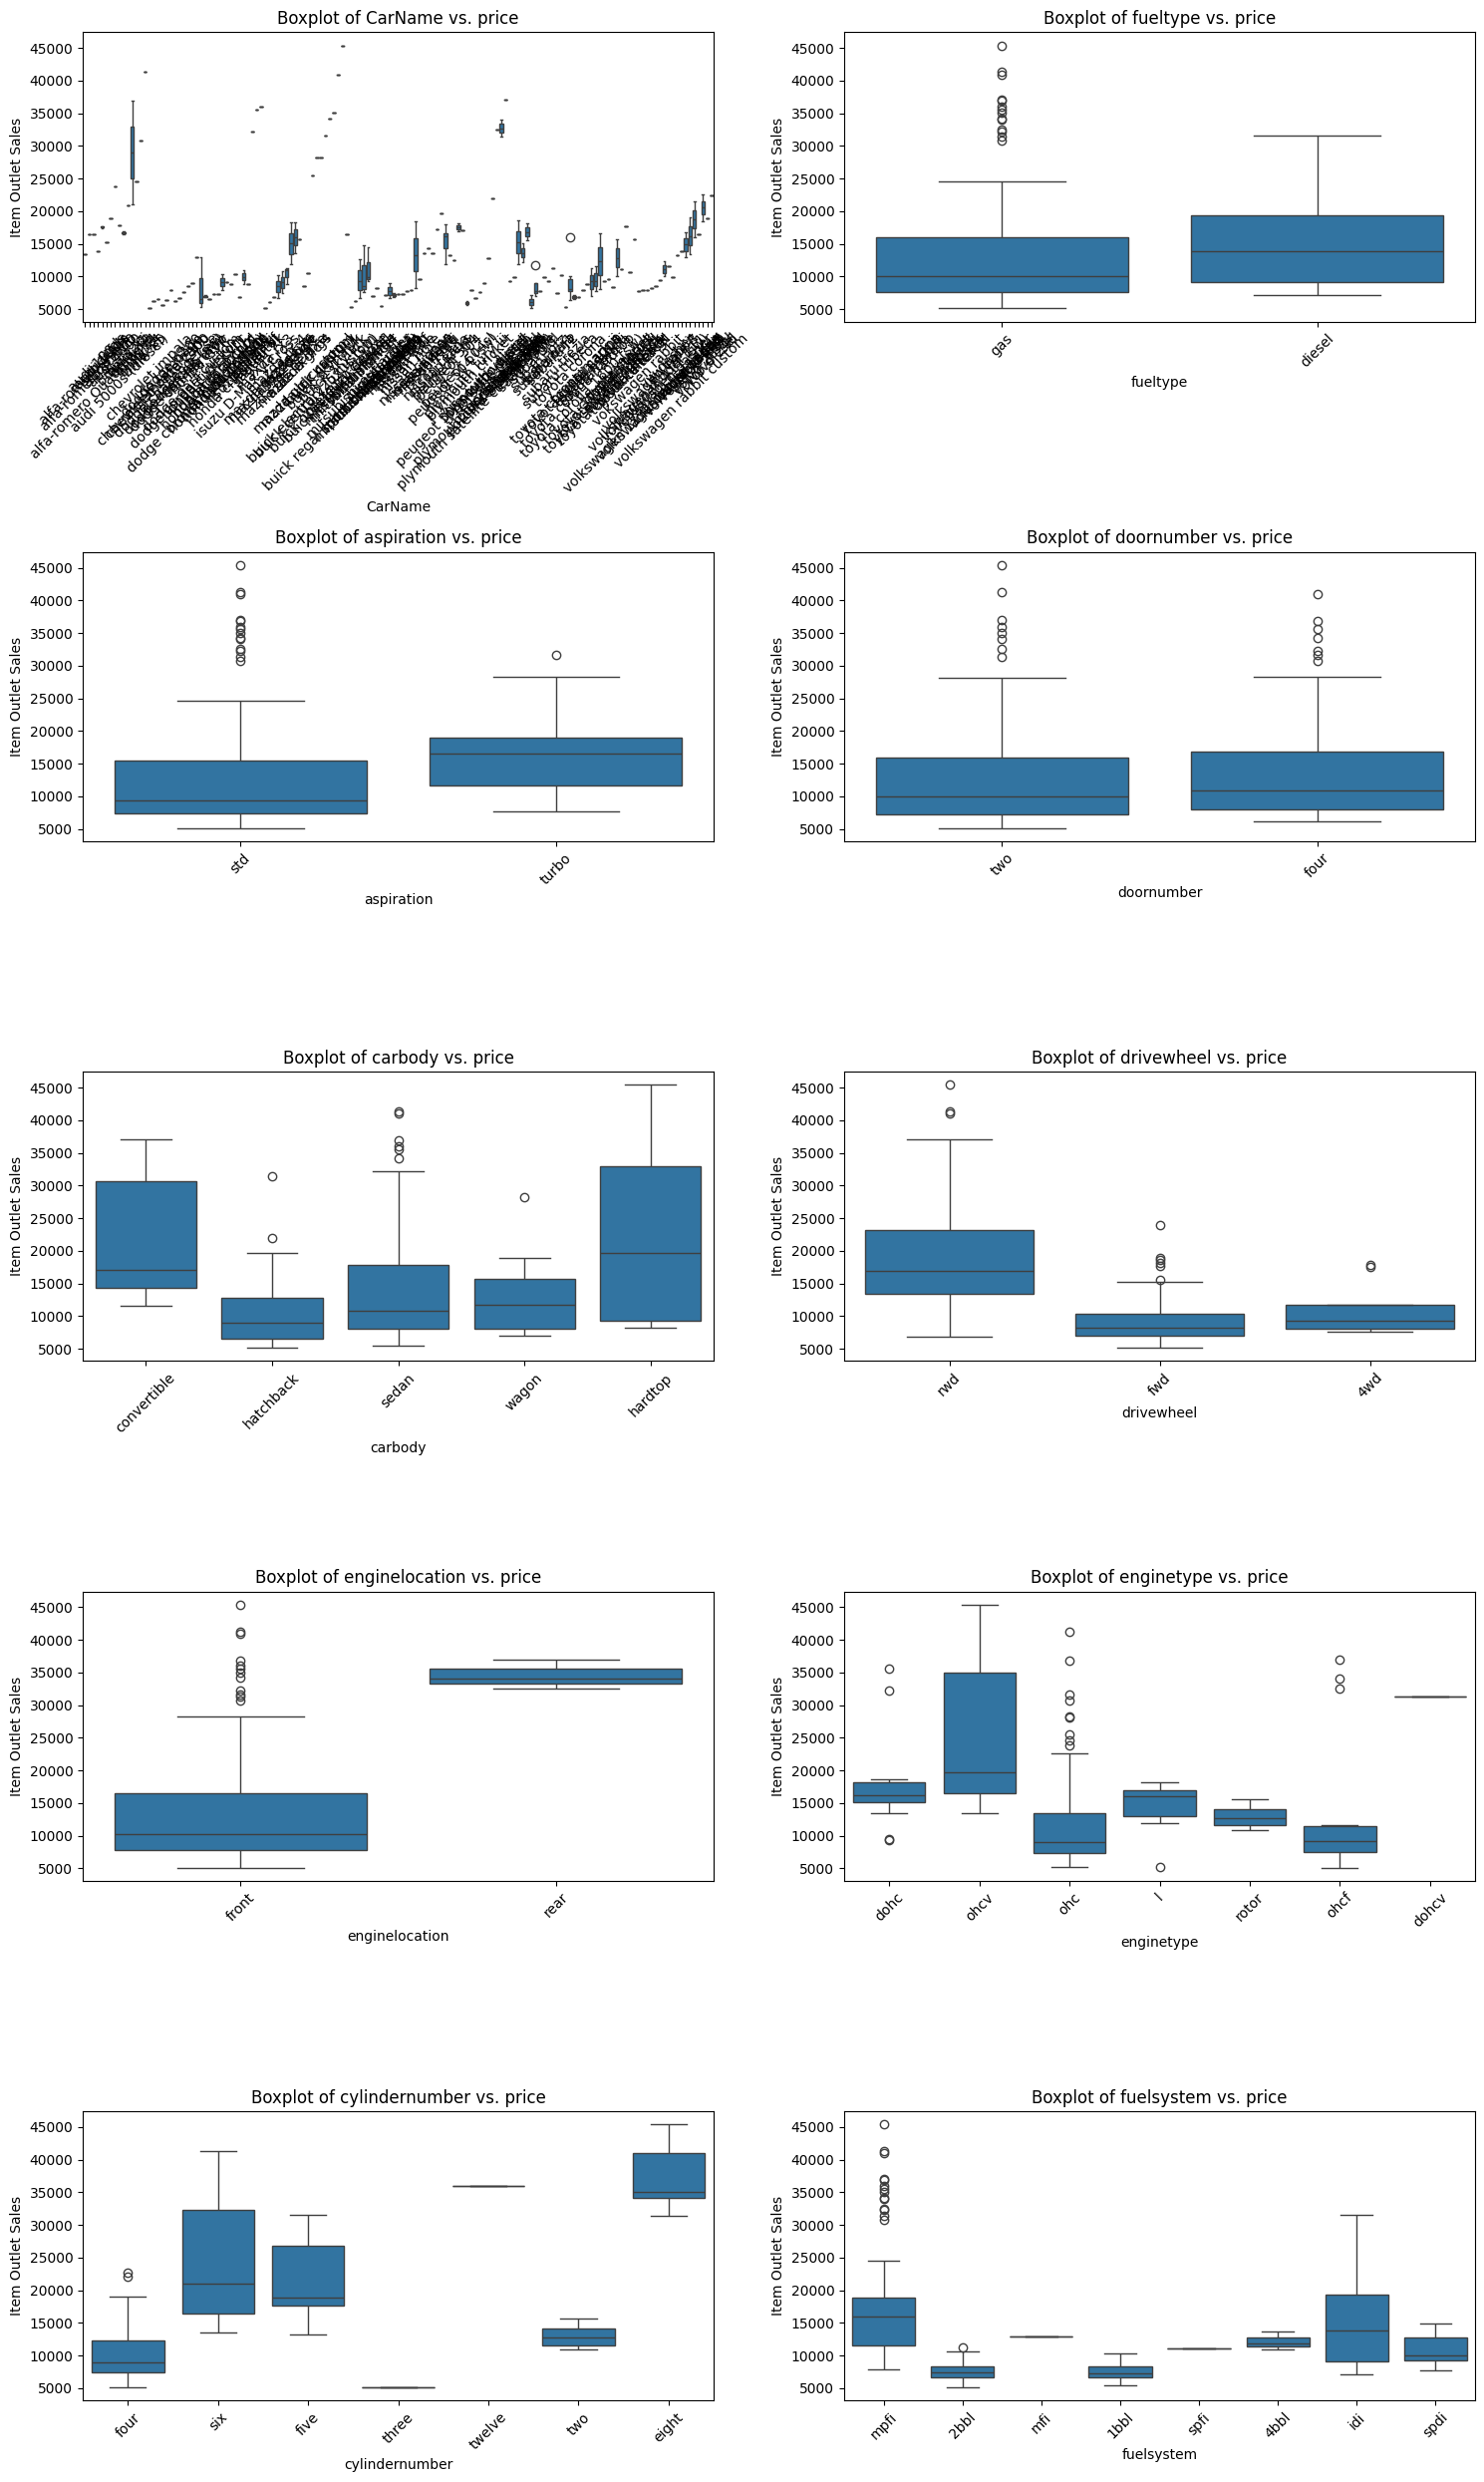

In [131]:
# Draw boxplots for each categorical variable
rows = (len(categorical_vars) + 1) // 2
fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, cat_var in enumerate(categorical_vars):
    sns.boxplot(x=cat_var, y='price', data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {cat_var} vs. price')
    axes[i].set_xlabel(cat_var)
    axes[i].set_ylabel('Item Outlet Sales')
    axes[i].tick_params(axis='x', rotation=45)

# Hide empty subplots
for i in range(len(categorical_vars), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Diesel fueltype cars are comparatively expensive than the cars with fueltype as gas.
All the types of carbody is relatively cheaper as compared to convertible and hardtop carbody.
The cars with rear enginelocation are way expensive than cars with front enginelocation.
rwd drivewheel car price is always very high.
Enginetype ohcv comes into higher price range cars.
The price of car is directly proportional to no. of cylinders in most cases.

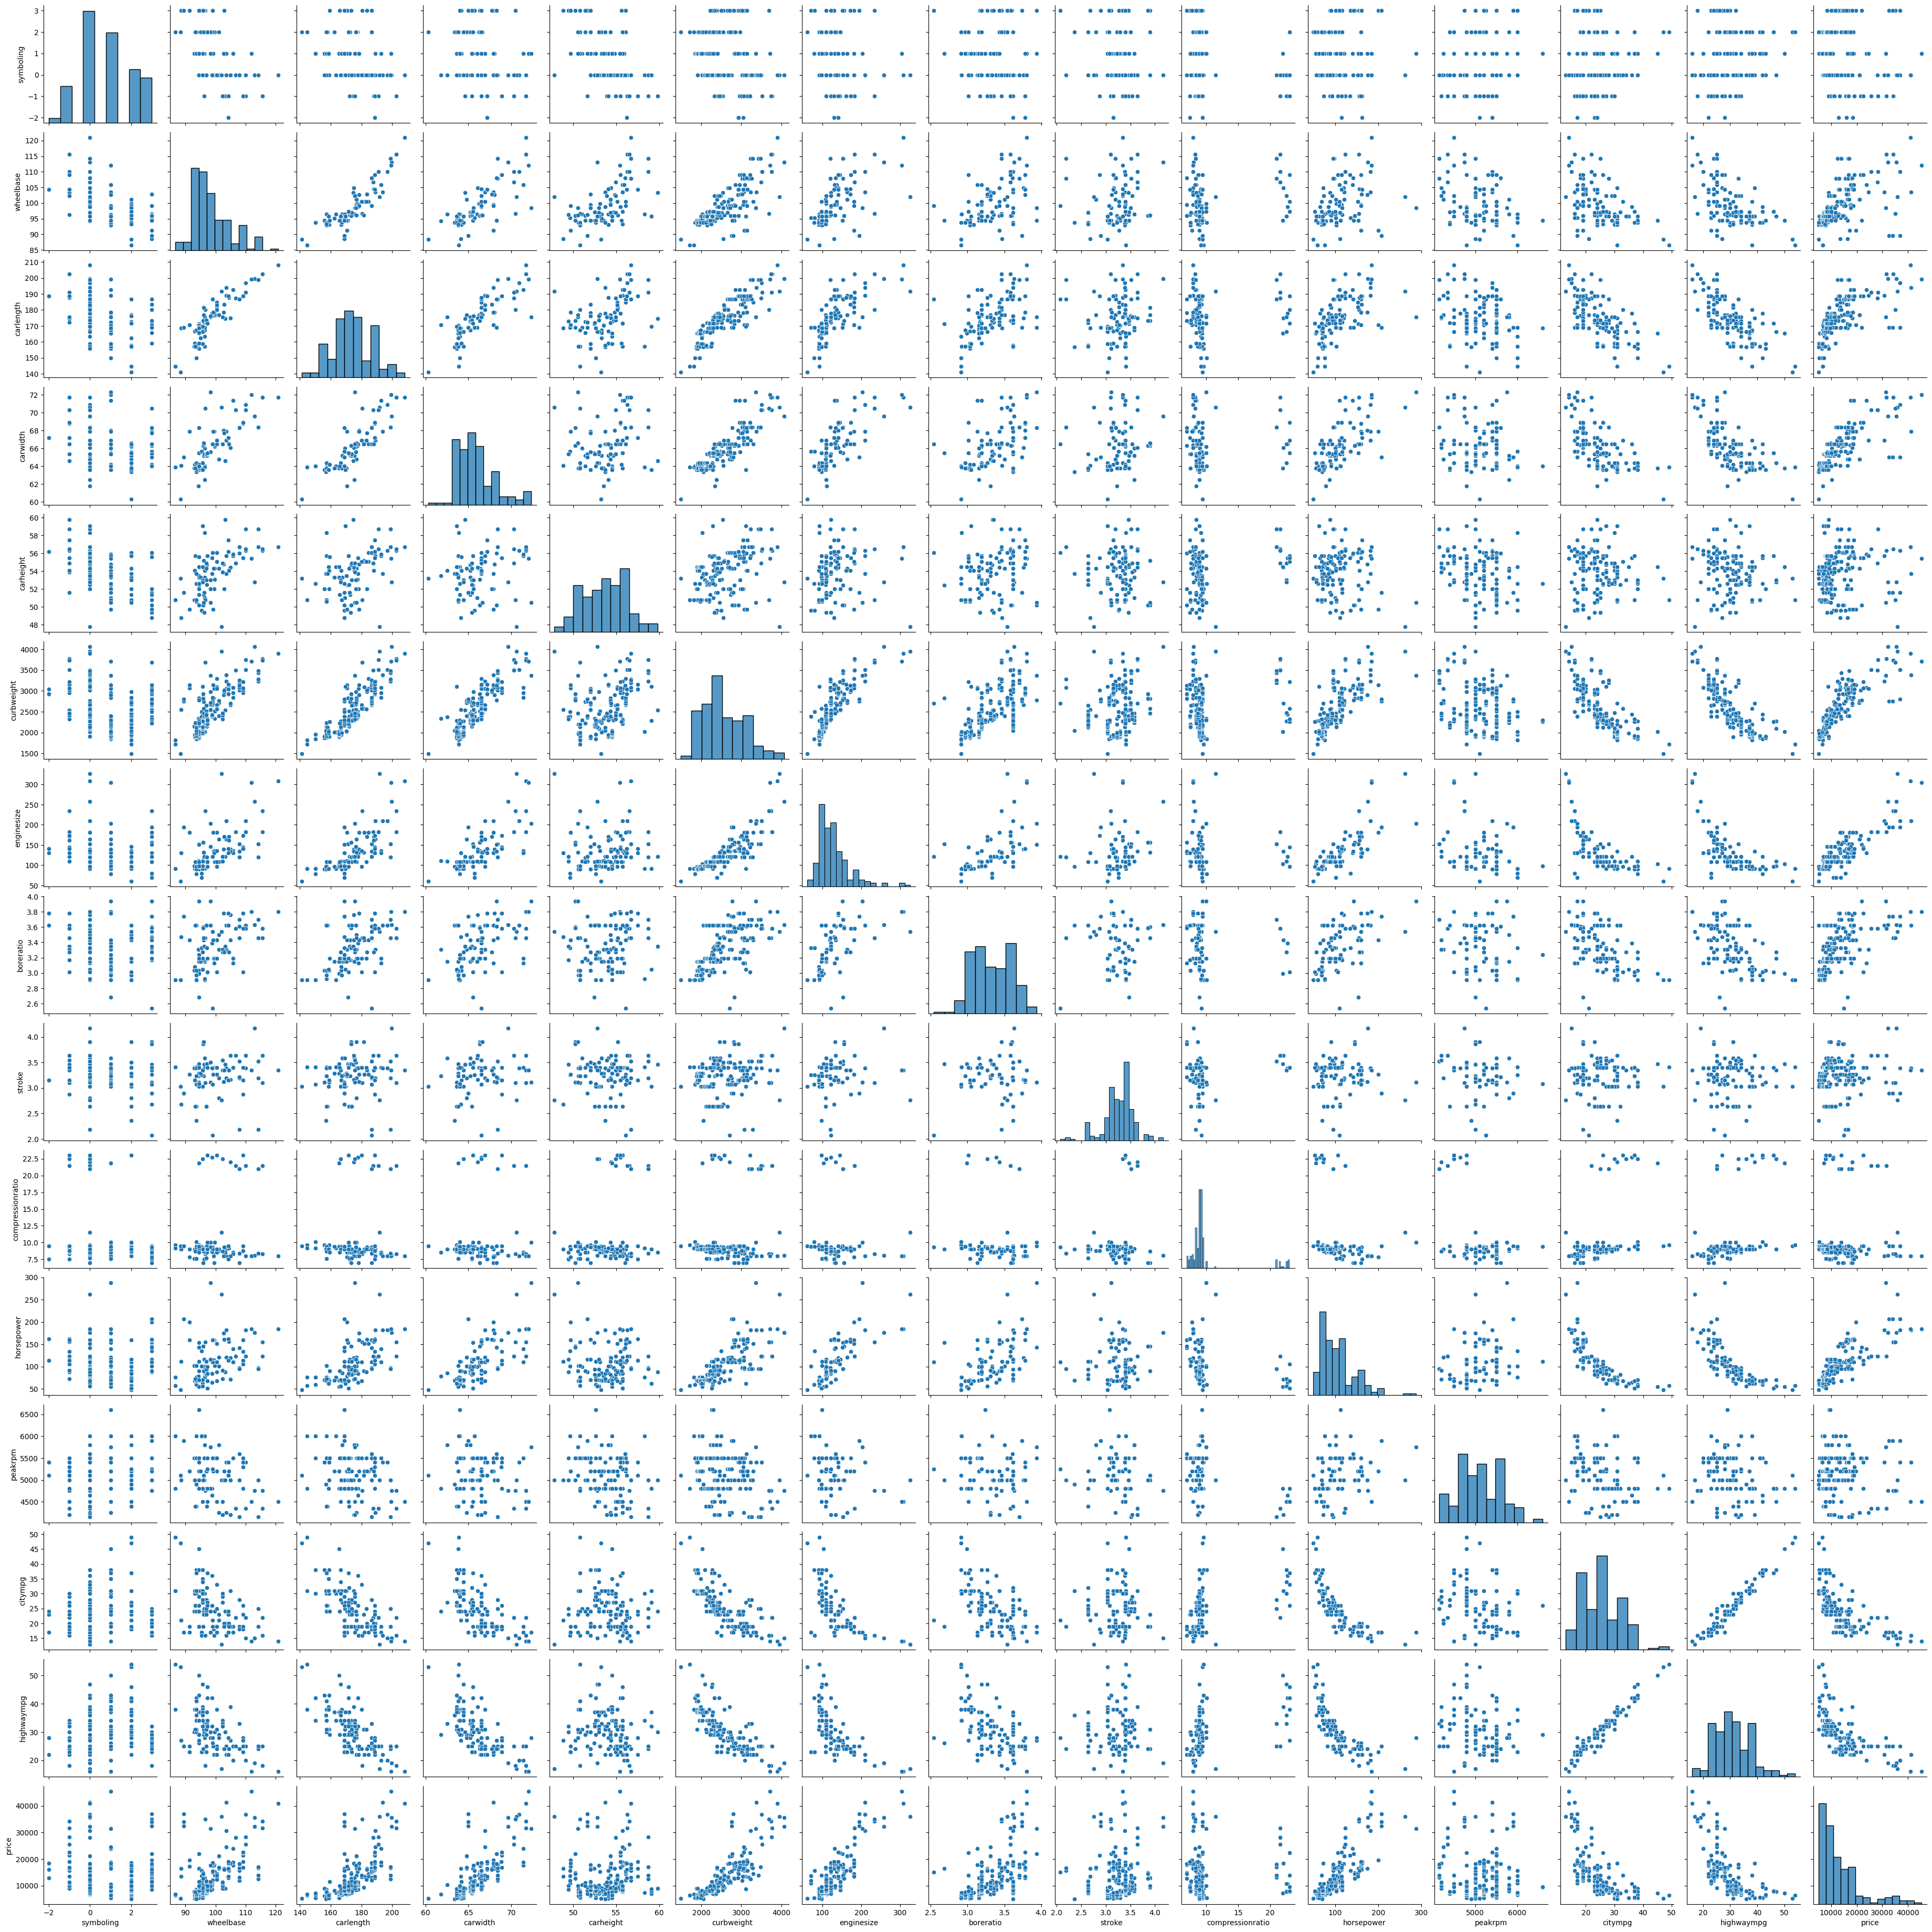

In [132]:
sns.pairplot(data=df[numerical_vars], height=2.5)
plt.show()

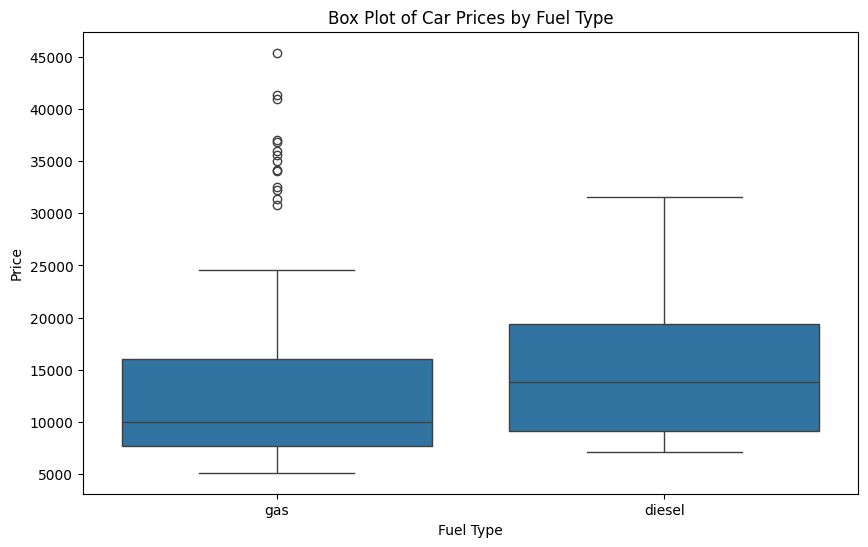

In [133]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fueltype', y='price', data=df)
plt.title('Box Plot of Car Prices by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

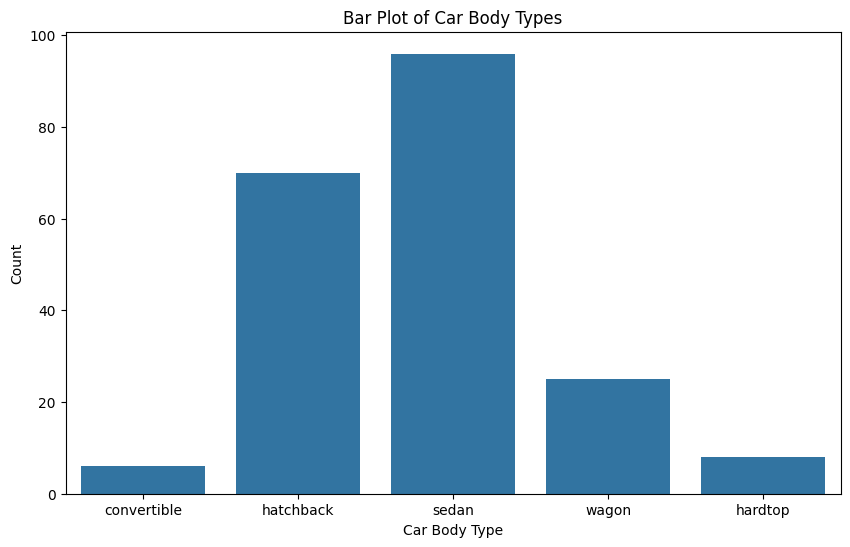

In [134]:
plt.figure(figsize=(10, 6))
sns.countplot(x='carbody', data=df)
plt.title('Bar Plot of Car Body Types')
plt.xlabel('Car Body Type')
plt.ylabel('Count')
plt.show()

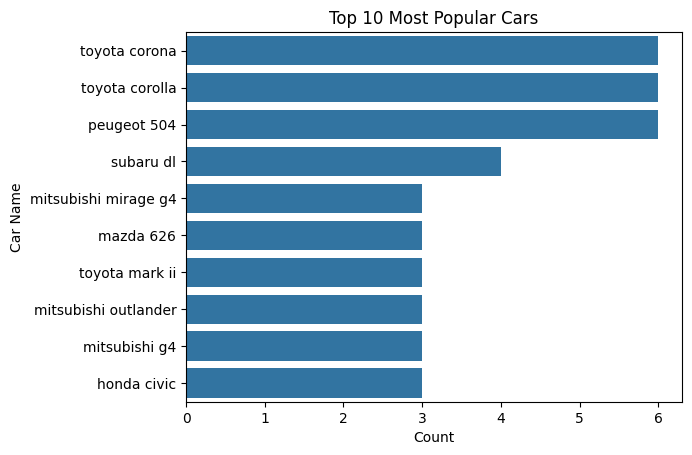

In [135]:
car_counts = df['CarName'].value_counts()

# Get the top 10 most popular car names
top_10_cars = car_counts.head(10).index

# Filter the DataFrame for the top 10 cars
top_10_df = df[df['CarName'].isin(top_10_cars)]

sns.countplot(y='CarName', order=top_10_cars, data=top_10_df)
plt.title('Top 10 Most Popular Cars')
plt.xlabel('Count')
plt.ylabel('Car Name')
plt.show()


<ipython-input-136-dd54bfec54e8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_make, y=make_gp.head(10).values, palette='viridis')


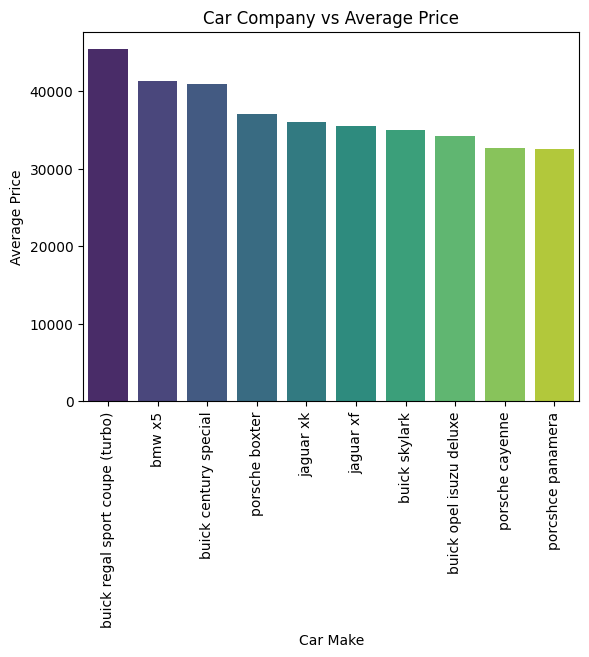

In [136]:
make_gp = df.groupby('CarName')['price'].mean().sort_values(ascending=False)
# Extract the top 10 car names
top_10_make = make_gp.head(10).index

# Create the bar plot for car make vs. average price
sns.barplot(x=top_10_make, y=make_gp.head(10).values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Car Make')
plt.ylabel('Average Price')
plt.title('Car Company vs Average Price')
plt.show()


## **MODEL BUILDING**

**Define features and target**

In [137]:
X=df.copy()
y=X.pop('price')

In [138]:
# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

**Feature selection using Mutual Information**

In [139]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]

curbweight        1.326527
highwaympg        0.926830
wheelbase         0.578429
boreratio         0.464509
stroke            0.363745
drivewheel        0.332959
enginetype        0.165926
enginelocation    0.038978
Name: MI Scores, dtype: float64

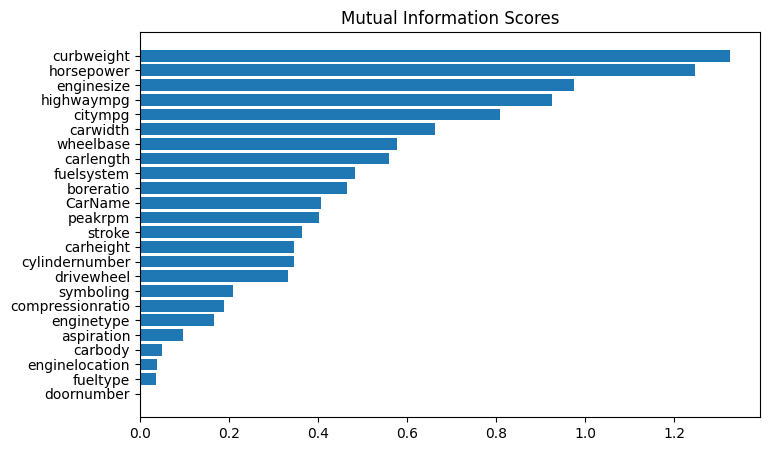

In [140]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

Since door number has MI is 0 this means the quantities are independent: neither can tell you anything about the other.

As we might expect, the high-scoring curb_weight feature exhibits a strong relationship with price, the target, as heavier cars tend to use higher quality or larger quantities of materials.


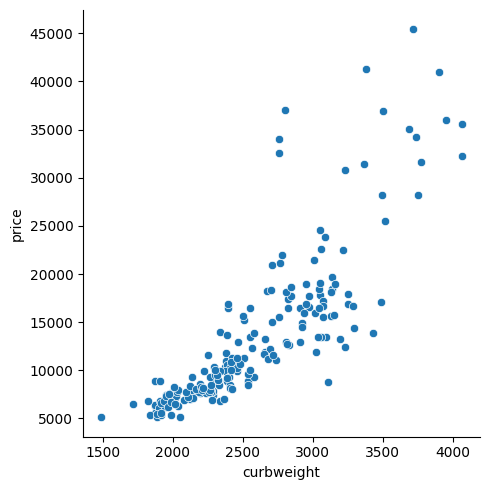

In [141]:
sns.relplot(x="curbweight", y="price", data=df);

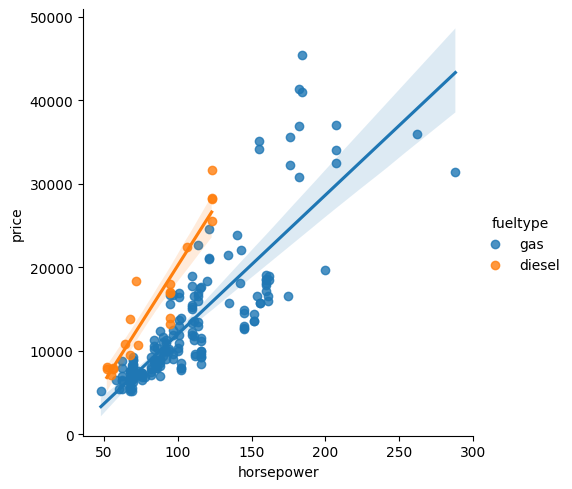

In [142]:
sns.lmplot(x="horsepower", y="price", hue="fueltype", data=df);

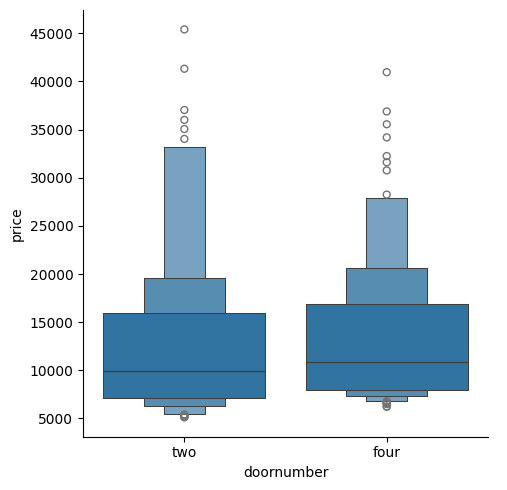

In [143]:
sns.catplot(x="doornumber", y="price", data=df, kind="boxen");

 We have no reason to believe doornumber has any significant impact on the target variable, so we`ll drop the variable.

In [144]:
X= X.drop('doornumber', axis=1)

**Split the data**

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

**Linear Regression**

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
#specify the model.
lr_model = LinearRegression()

# Fit the model
lr_model.fit(X_train,y_train)

#Predict the model
lr_test = lr_model.predict(X_test)

#Evaluate the model R² score (Coefficient of Determination) on the test set
lr_score=r2_score(y_test,lr_test)
print('Coefficient of Determination',lr_score)

#Mean absolute error
lr_mae=mean_absolute_error(y_test,lr_test)
print('Mean absolute error',lr_mae)

Coefficient of Determination 0.8684017888459705
Mean absolute error 1990.50984650458


**DecisionTree**

In [147]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=0)

# Fit the dt_model
dt_model.fit(X_train,y_train)

#Predict the dt_model
dtr_test = dt_model.predict(X_test)


#Evaluate the dt_model R² score (Coefficient of Determination) on the test set
dtr_score=r2_score(y_test,dtr_test)
print('Coefficient of Determination',dtr_score)

#Mean absolute error
dtr_mae=mean_absolute_error(y_test,dtr_test)
print('Mean absolute error',dtr_mae)

Coefficient of Determination 0.8586287875244172
Mean absolute error 2050.105769230769


**Random Forest**

In [148]:
from sklearn.ensemble import RandomForestRegressor

#specify the model.
rf_model = RandomForestRegressor(random_state=0)

# Fit the model
rf_model.fit(X_train,y_train)

#Predict the model
rfrs_test = rf_model.predict(X_test)

#Evaluate the model R² score (Coefficient of Determination) on the test set
rfrs_score=r2_score(y_test,rfrs_test)
print('Coefficient of Determination',rfrs_score)

#Mean absolute error
rfrs_mae=mean_absolute_error(y_test,rfrs_test)
print('Mean absolute error',rfrs_mae)

Coefficient of Determination 0.9048580836774879
Mean absolute error 1803.4814734615388


**XGBOOST**

In [149]:
from xgboost import XGBRegressor

#specify the model.
xgb_model = XGBRegressor()

# Fit the model
xgb_model.fit(X_train,y_train)

#Predict the model
xgb_test = xgb_model.predict(X_test)

#Evaluate the model R² score (Coefficient of Determination) on the test set
xgb_score=r2_score(y_test,xgb_test)
print('Coefficient of Determination',xgb_score)

#Mean absolute error
xgb_mae=mean_absolute_error(y_test,xgb_test)
print('Mean absolute error',xgb_mae)

Coefficient of Determination 0.9001406671752333
Mean absolute error 1827.6978478064905


From the models above we can see that RandomForest is the best model as it has the lowest MAE and highest r2 score.

**SAVING THE RANDOM FOREST MODEL FOR FUTURE PREDICTION**

In [150]:
import pickle

# Save the Random Forest model to a file
with open('final_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)
result = rf_model.score(X_test,y_test)
print('With',round(result * 100, 2),'%Accuracy')

With 90.49 %Accuracy
